# Cleaning

In [1]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import data
data = pd.read_csv('data ecommerce.csv')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
#Print data size and type
print('row number = {}, column number = {}'.format(data.shape[0], data.shape[1]))
display(data.dtypes)

row number = 541909, column number = 8


InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [4]:
#Check if there is any missing value
display(data.isna().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
#Dropping missing values
data = data.dropna()
print('number of rows = ',data.shape[0])

number of rows =  406829


In [6]:
# Removing data with quantity number less than 0 
data = data[data.Quantity >= 0]
print('final number of rows = ',data.shape[0])

final number of rows =  397924


In [7]:
# Changing the columns type
data.CustomerID = data.CustomerID.astype('int')
data.InvoiceDate = pd.to_datetime(data.InvoiceDate)
data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int32
Country                object
dtype: object

In [8]:
# Renaming columns to ease the typing process
data = data.rename(columns = {'InvoiceNo': 'invoice', 'StockCode': 'product', 
                              'Description': 'description', 'Quantity': 'quantity',
                             'InvoiceDate': 'date', 'UnitPrice': 'price', 'CustomerID': 'customer_id',
                             'Country': 'country'})

# Add 'total' column as the total revenue for each product order
data['total'] = data.quantity * data.price
data.head()

,invoice,product,description,quantity,date,price,customer_id,country,total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


# Exploration

## Revenue per month, AOA

In [9]:
# Declaring color codes for visualization
green = '#134f5cff'
orange = '#ff9900ff'

In [10]:
#Order dataset for each order characteristic
order = data.groupby(['invoice', 'date', 'customer_id','country']).agg({'product': 'count','quantity': 'sum','total':'sum'}).reset_index()
order['average_price'] = order.total/order.quantity
order

,invoice,date,customer_id,country,product,quantity,total,average_price
0,536365,2010-12-01 08:26:00,17850,United Kingdom,7,40,139.12,3.478000
1,536366,2010-12-01 08:28:00,17850,United Kingdom,2,12,22.20,1.850000
2,536367,2010-12-01 08:34:00,13047,United Kingdom,12,83,278.73,3.358193
3,536368,2010-12-01 08:34:00,13047,United Kingdom,4,15,70.05,4.670000
4,536369,2010-12-01 08:35:00,13047,United Kingdom,1,3,17.85,5.950000
...,...,...,...,...,...,...,...,...
18561,581583,2011-12-09 12:23:00,13777,United Kingdom,2,76,124.60,1.639474
18562,581584,2011-12-09 12:25:00,13777,United Kingdom,2,120,140.64,1.172000
18563,581585,2011-12-09 12:31:00,15804,United Kingdom,21,278,329.05,1.183633
18564,581586,2011-12-09 12:49:00,13113,United Kingdom,4,66,339.20,5.139394


<Figure size 432x288 with 0 Axes>

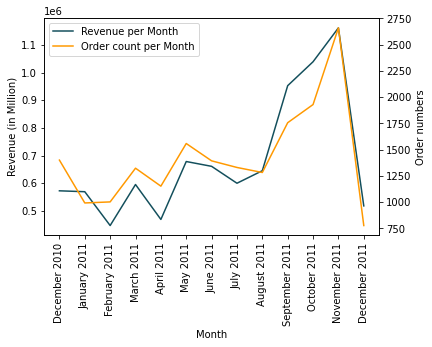

In [11]:
#Comparing total revenue and total order per month

# Total Revenue per Month
permonth = data.groupby(pd.Grouper(key = 'date',freq = 'M'))['total'].sum().reset_index()
permonth.date = permonth.date.dt.strftime('%B %Y')

plt.clf()

fig, ax = plt.subplots()
ax.plot(permonth.date, permonth.total, color = '#134f5cff', label = 'Revenue per Month')
ax.set_ylabel('Revenue (in Million)')
ax.set_xlabel('Month')
plt.xticks(rotation = 90)
ax.legend()

#Total order per month
permonth_order= order.groupby(pd.Grouper(key = 'date', freq = 'M'))['invoice'].count().reset_index()
permonth_order.date = permonth_order.date.dt.strftime('%B %Y')

ax2 = ax.twinx()
ax2.plot(permonth_order.date, permonth_order.invoice, color = '#ff9900ff', label = 'Order count per Month')
ax2.set_ylabel('Order numbers')

lines_1, labels_1 = ax.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines = lines_1 + lines_2
labels = labels_1 + labels_2

ax.legend(lines, labels, loc=0)

The total revenue is decreasing significantly, despite its increase throughout the year. It can be seen that it is positively related to the also-decreasing number of orders at the end of the year

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

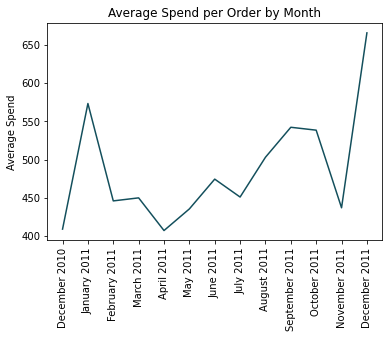

In [12]:
#Average Spend per Order
aod = order.groupby(pd.Grouper(key = 'date', freq = 'M'))['total'].mean().reset_index()
aod.date = aod.date.dt.strftime('%B %Y')

plt.plot(aod.date, aod.total, color = green, label = 'Average Spend per Order')
plt.ylabel('Average Spend')
plt.title('Average Spend per Order by Month')
plt.xticks(rotation = 90)

It is interesting to see that the revenue and order number are both decreasing significantly while the average spend per order is increasing in December 2011

## Order Percentage

In [13]:
# Customer table to see the characteristics for each customer

customer = order.groupby(['customer_id', 'country']).agg({'invoice':'count','quantity':'sum', 'total': 'sum'}).reset_index()
customer['average_per_order'] = customer.total/customer.invoice
customer

,customer_id,country,invoice,quantity,total,average_per_order
0,12346,United Kingdom,1,74215,77183.60,77183.600000
1,12347,Iceland,7,2458,4310.00,615.714286
2,12348,Finland,4,2341,1797.24,449.310000
3,12349,Italy,1,631,1757.55,1757.550000
4,12350,Norway,1,197,334.40,334.400000
...,...,...,...,...,...,...
4342,18280,United Kingdom,1,45,180.60,180.600000
4343,18281,United Kingdom,1,54,80.82,80.820000
4344,18282,United Kingdom,2,103,178.05,89.025000
4345,18283,United Kingdom,16,1397,2094.88,130.930000


In [14]:
#Grouping categories to ease the visualization process
customer['order_category'] = np.where(customer.invoice <=50, customer.invoice, '>50')
customer

,customer_id,country,invoice,quantity,total,average_per_order,order_category
0,12346,United Kingdom,1,74215,77183.60,77183.600000,1
1,12347,Iceland,7,2458,4310.00,615.714286,7
2,12348,Finland,4,2341,1797.24,449.310000,4
3,12349,Italy,1,631,1757.55,1757.550000,1
4,12350,Norway,1,197,334.40,334.400000,1
...,...,...,...,...,...,...,...
4342,18280,United Kingdom,1,45,180.60,180.600000,1
4343,18281,United Kingdom,1,54,80.82,80.820000,1
4344,18282,United Kingdom,2,103,178.05,89.025000,2
4345,18283,United Kingdom,16,1397,2094.88,130.930000,16


<Figure size 432x288 with 0 Axes>

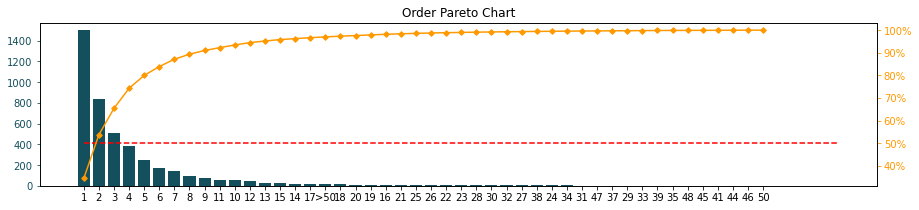

In [15]:
#Pareto chart for order numbers

import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

plt.clf()
fig = plt.figure(figsize = (15,3))
ax = fig.add_subplot(111)

color1 = green
color2 = orange
line_size = 4

ax.bar(customer.order_category.value_counts().index, customer.order_category.value_counts().values, color=color1)

ax2 = ax.twinx()
ax2.plot(customer.order_category.value_counts().index, 
         customer.order_category.value_counts().values.cumsum()/customer.order_category.value_counts().values.sum()*100, 
         color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.hlines(y = 50, xmin = 0, xmax = 50, color= 'red', linestyle = 'dashed', alpha = 1)

ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)

plt.title('Order Pareto Chart')
plt.show()

It  be seen that the first time orders only take up 50% of the whole order, which means that half of the orders are from new customer and the other half are from recurring customer. This percentage of recurring customer is really nice to have, since acquisition costs to gain new customers are tend to me higher that retention cost to keep the existing customers

<Figure size 432x288 with 0 Axes>

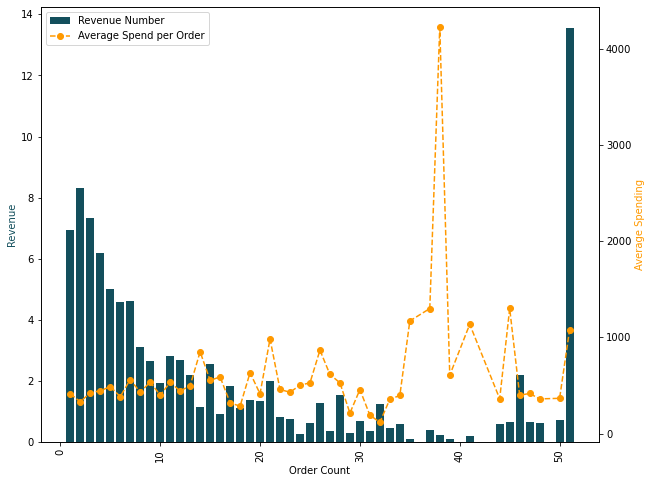

In [16]:
# Total Revenue
percentage=((customer.groupby('order_category')['total'].sum()/customer.total.sum())*100).reset_index()
percentage.order_category = np.where(percentage.order_category == '>50', '51', percentage.order_category)
percentage.order_category = percentage.order_category.astype('int')
percentage = percentage.sort_values(by = 'order_category')

plt.xticks(rotation = 90)

plt.clf()

fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111)
ax.bar(percentage['order_category'], percentage['total'], label = 'Revenue Number', color = green)
ax.set_ylabel('Revenue', color = green)
ax.set_xlabel('Order Count')
plt.xticks(rotation = 90)
ax.legend()

#Average spend per order
cus_ao = customer.groupby('order_category')['average_per_order'].mean().reset_index()
cus_ao.order_category = np.where(cus_ao.order_category == '>50', '51', percentage.order_category)
cus_ao.order_category = cus_ao.order_category.astype('int')
cus_ao = cus_ao.sort_values(by = 'order_category')

ax2 = ax.twinx()
plt.plot(cus_ao['order_category'], cus_ao['average_per_order'], marker = 'o', linestyle = 'dashed', color = orange, label = 'Average Spend per Order')
ax2.set_ylabel('Average Spending', color = orange)

lines_1, labels_1 = ax.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines = lines_1 + lines_2
labels = labels_1 + labels_2

ax.legend(lines, labels, loc=0)

There are two interesting peaks for each revenue and average spending graph. This can add more interesting insight if the used data is expanded to customer demographic data

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

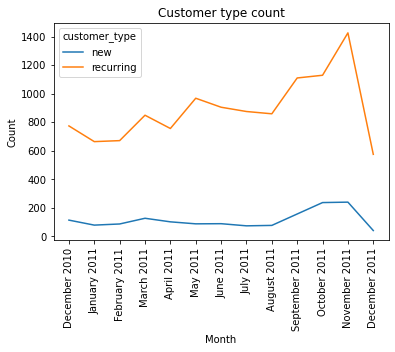

In [17]:
#Customer type comparison
customer['customer_type'] = np.where(customer.invoice ==1, 'new','recurring')
cus_order = order.merge(customer, on = 'customer_id')
df2 = cus_order.groupby([pd.Grouper(key = 'date', freq = 'M'),'customer_type'])['customer_id'].nunique().reset_index()
df2.date = pd.to_datetime(df2.date)
df2.date = df2.date.dt.strftime('%B %Y')
sns.lineplot(data = df2, x = 'date', y = 'customer_id', hue = 'customer_type')
plt.title('Customer type count')
plt.ylabel('Count')
plt.xlabel('Month')
plt.xticks(rotation = 90)

The pattern is different in the middle of the year, but both customer type decreasing significantly at the end of the year

## Countries

In [19]:
#Country table to see orders characteristics for each country
countries = order.groupby('country').agg({'total':'sum', 'invoice':'count'})
countries['average_per_order'] = countries.total/countries.invoice
countries

,total,invoice,average_per_order
country,,,
Australia,138521.310,57,2430.198421
Austria,10198.680,17,599.922353
Bahrain,548.400,2,274.200000
Belgium,41196.340,98,420.370816
Brazil,1143.600,1,1143.600000
Canada,3666.380,6,611.063333
Channel Islands,20450.440,26,786.555385
Cyprus,13590.380,16,849.398750
Czech Republic,826.740,2,413.370000


<Figure size 432x288 with 0 Axes>

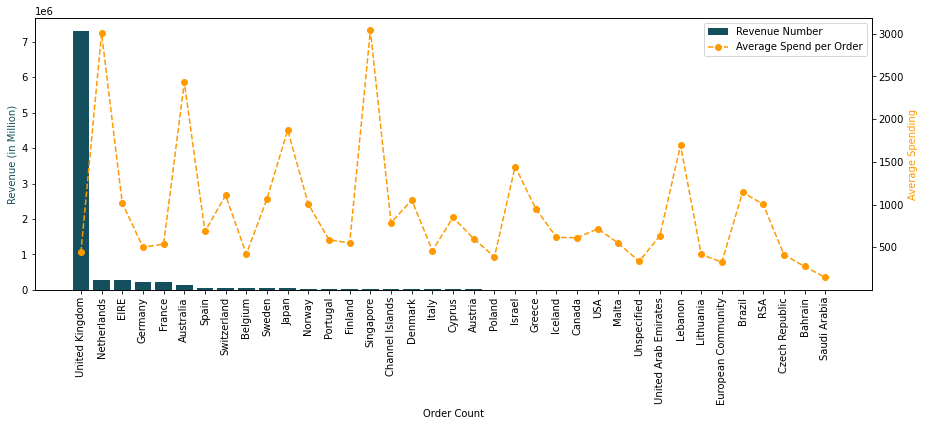

In [20]:
#Plot for country
plotting = countries.sort_values(by = 'total', ascending = False)
plt.xticks(rotation = 90)
plt.clf()

fig = plt.figure(figsize = (15,5))
ax = fig.add_subplot(111)
ax.bar(plotting.index, plotting['total'], label = 'Revenue Number', color = green)
ax.set_ylabel('Revenue (in Million)', color = green)
ax.set_xlabel('Order Count')
plt.xticks(rotation = 90)
ax.legend()

ax2 = ax.twinx()
plt.plot(plotting.index, plotting['average_per_order'], marker = 'o', linestyle = 'dashed', color = orange, label = 'Average Spend per Order')
ax2.set_ylabel('Average Spending', color = orange)

lines_1, labels_1 = ax.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines = lines_1 + lines_2
labels = labels_1 + labels_2

ax.legend(lines, labels, loc=0)

United Kingdom contributes the highest to the total revenue, while Singapore and Netherlands has the highest average apend order

# Customer Value

Customer value will be determined by the recency, frequency, and monetary value.
1. Recency : How recent the last purchase from recent date
2. Frequency: Purchase frequency
3. Monetary: Total money spent

In [24]:
#Making recency data
recent_date = data.date.max()
recency_data = data.groupby('customer_id')['date'].max().reset_index()
recency_data['recency'] = recency_data['date'].apply(lambda x: (recent_date - x).days)
recency_data

,customer_id,date,recency
0,12346,2011-01-18 10:01:00,325
1,12347,2011-12-07 15:52:00,1
2,12348,2011-09-25 13:13:00,74
3,12349,2011-11-21 09:51:00,18
4,12350,2011-02-02 16:01:00,309
...,...,...,...
4334,18280,2011-03-07 09:52:00,277
4335,18281,2011-06-12 10:53:00,180
4336,18282,2011-12-02 11:43:00,7
4337,18283,2011-12-06 12:02:00,3


In [25]:
#CLV table to store recency, frequency, and monetary value
clv = data.groupby('customer_id').agg({'invoice': 'count', 'total': 'sum'}).reset_index()
clv = clv.merge(recency_data, on = 'customer_id')
clv.drop('date', axis =1, inplace = True)
clv.set_index('customer_id', inplace = True)
clv = clv.rename(columns = {'invoice':'frequency', 'total':'monetary'})
clv

,frequency,monetary,recency
customer_id,,,
12346,1,77183.60,325
12347,182,4310.00,1
12348,31,1797.24,74
12349,73,1757.55,18
12350,17,334.40,309
...,...,...,...
18280,10,180.60,277
18281,7,80.82,180
18282,12,178.05,7


In [26]:
#Normalizing ranks for each factor
from sklearn.preprocessing import MinMaxScaler
clv['rank_f'] = clv.frequency.rank(ascending = True)
clv['rank_m'] = clv.monetary.rank(ascending = True)
clv['rank_r'] = clv.recency.rank(ascending = False)

cols = ['rank_f', 'rank_m', 'rank_r']
new_cols = ['norm_f', 'norm_m', 'norm_r']
scaler = MinMaxScaler()
scaler.fit(clv[cols])
clv[new_cols]= scaler.transform(clv[cols])
clv

,frequency,monetary,recency,rank_f,rank_m,rank_r,norm_f,norm_m,norm_r
customer_id,,,,,,,,,
12346,1,77183.60,325,36.5,4330.0,161.0,0.000000,0.997925,0.036605
12347,182,4310.00,1,3823.0,4004.0,4203.5,0.880070,0.922775,0.979133
12348,31,1797.24,74,1827.5,3334.0,1653.0,0.416270,0.768326,0.384472
12349,73,1757.55,18,2888.5,3306.0,3182.0,0.662870,0.761872,0.740965
12350,17,334.40,309,1081.5,1230.0,230.5,0.242882,0.283310,0.052810
...,...,...,...,...,...,...,...,...,...
18280,10,180.60,277,622.5,564.0,353.0,0.136200,0.129783,0.081371
18281,7,80.82,180,407.0,105.0,859.5,0.086113,0.023974,0.199464
18282,12,178.05,7,769.0,547.0,3795.5,0.170250,0.125864,0.884006


In [27]:
#Determining the weight for each factor
weight_r = 0.1
weight_f = 0.3
weight_m = 0.6

#Counting customer value based on the determined weight
clv['rfm'] = ((weight_r * clv.norm_r) + (weight_f * clv.norm_f) + (weight_m * clv.norm_m))*100
clv

,frequency,monetary,recency,rank_f,rank_m,rank_r,norm_f,norm_m,norm_r,rfm
customer_id,,,,,,,,,,
12346,1,77183.60,325,36.5,4330.0,161.0,0.000000,0.997925,0.036605,60.241571
12347,182,4310.00,1,3823.0,4004.0,4203.5,0.880070,0.922775,0.979133,91.559947
12348,31,1797.24,74,1827.5,3334.0,1653.0,0.416270,0.768326,0.384472,62.432392
12349,73,1757.55,18,2888.5,3306.0,3182.0,0.662870,0.761872,0.740965,73.008075
12350,17,334.40,309,1081.5,1230.0,230.5,0.242882,0.283310,0.052810,24.813173
...,...,...,...,...,...,...,...,...,...,...
18280,10,180.60,277,622.5,564.0,353.0,0.136200,0.129783,0.081371,12.686705
18281,7,80.82,180,407.0,105.0,859.5,0.086113,0.023974,0.199464,6.016470
18282,12,178.05,7,769.0,547.0,3795.5,0.170250,0.125864,0.884006,21.499419


In [28]:
#Defining segment name
clv['segments'] = np.where(clv['rfm']>75, 'High', np.where(clv['rfm'] <50, 'Low', 'Medium'))
clv

,frequency,monetary,recency,rank_f,rank_m,rank_r,norm_f,norm_m,norm_r,rfm,segments
customer_id,,,,,,,,,,,
12346,1,77183.60,325,36.5,4330.0,161.0,0.000000,0.997925,0.036605,60.241571,Medium
12347,182,4310.00,1,3823.0,4004.0,4203.5,0.880070,0.922775,0.979133,91.559947,High
12348,31,1797.24,74,1827.5,3334.0,1653.0,0.416270,0.768326,0.384472,62.432392,Medium
12349,73,1757.55,18,2888.5,3306.0,3182.0,0.662870,0.761872,0.740965,73.008075,Medium
12350,17,334.40,309,1081.5,1230.0,230.5,0.242882,0.283310,0.052810,24.813173,Low
...,...,...,...,...,...,...,...,...,...,...,...
18280,10,180.60,277,622.5,564.0,353.0,0.136200,0.129783,0.081371,12.686705,Low
18281,7,80.82,180,407.0,105.0,859.5,0.086113,0.023974,0.199464,6.016470,Low
18282,12,178.05,7,769.0,547.0,3795.5,0.170250,0.125864,0.884006,21.499419,Low


In [29]:
#Counts for each segment
clv.segments.value_counts()

Low       2189
Medium    1185
High       965
Name: segments, dtype: int64

([<matplotlib.patches.Wedge at 0x29e6741be80>,
 [Text(-0.023295126772800292, 1.6498355484922247, 'Low'),
  Text(-1.043368714860772, -1.2782338302711993, 'Medium'),
  Text(1.2633758824141488, -1.0613111606566057, 'High')],
 [Text(-0.012706432785163792, 0.8999102991775769, '50.4%'),
  Text(-0.5691102081058755, -0.6972184528751996, '27.3%'),
  Text(0.6891141176804446, -0.5788969967217849, '22.2%')])

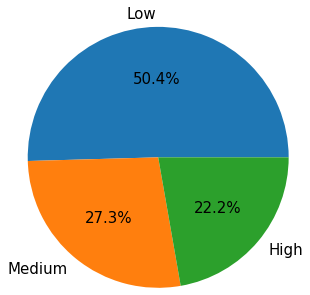

In [30]:
#Plotting each segment proportion
plt.pie(clv.segments.value_counts().values, labels = ['Low','Medium', 'High'],
        autopct = '%1.1f%%', radius = 1.5, textprops = {'fontsize' : 15})

Low value customer has the highest population

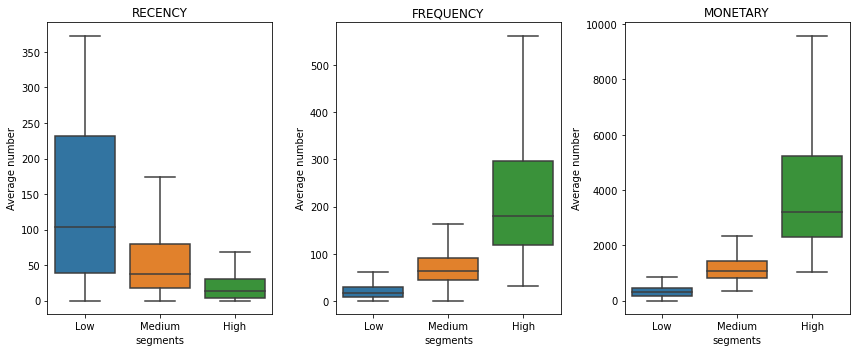

In [32]:
#Plotting the central tendency for each factor for each segment
plt.figure(figsize = (12,5))

column = ['recency', 'frequency', 'monetary']
order_graph = ['Low', 'Medium', 'High']
for i,ha in zip(column, range(1,4)):
    plt.subplot(1,3,ha)
    sns.boxplot(data = clv, x = 'segments', y = i, order = order_graph, showfliers = False)
    plt.title(str(i).upper())
    plt.ylabel('Average number')
    
plt.tight_layout()

The high value customer must be the most profitable segment since they have the most recent purchase, highest purchase frequency, and highest monetary value

Text(0.5, 1.0, 'Revenue Percentage by CLV Segments')

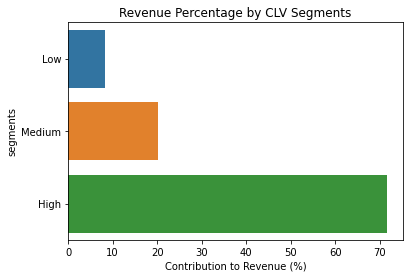

In [33]:
#Revenue percentage
rev = clv.groupby('segments')['monetary'].sum()/clv.monetary.sum()*100
sns.barplot(x= rev.values, y = rev.index, order = ['Low', 'Medium', 'High'])
plt.xlabel('Contribution to Revenue (%)')
plt.title('Revenue Percentage by CLV Segments')

Text(0.5, 0, 'Segments')

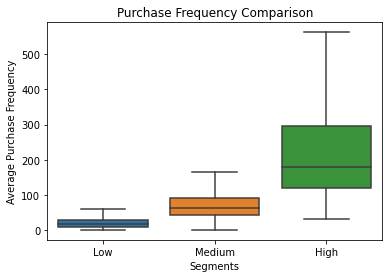

In [37]:
sns.boxplot(data = clv, x = 'segments', y = 'frequency', order = ['Low', 'Medium', 'High'], showfliers = False)
plt.title('Purchase Frequency Comparison')
plt.ylabel('Average Purchase Frequency')
plt.xlabel('Segments')

The high value customer revenue percentage is significantly higher than the rest of the segments

**Customer Value by Year**

In [42]:
#Table for customer value by year
clv_new = clv['segments'].reset_index()
data_new = order.copy()
cvy = data_new.merge(clv_new, on = 'customer_id', how = 'left')
cvy_new = cvy.groupby([pd.Grouper(key = 'date', freq = 'M'), 'segments']).agg({'customer_id': pd.Series.nunique}).reset_index()
cvy_high = cvy_new[cvy_new.segments == 'High'].reset_index(drop = True)
cvy_high

,date,segments,customer_id
0,2010-12-31,High,423
1,2011-01-31,High,392
2,2011-02-28,High,372
3,2011-03-31,High,480
4,2011-04-30,High,426
5,2011-05-31,High,526
6,2011-06-30,High,503
7,2011-07-31,High,489
8,2011-08-31,High,491
9,2011-09-30,High,586


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

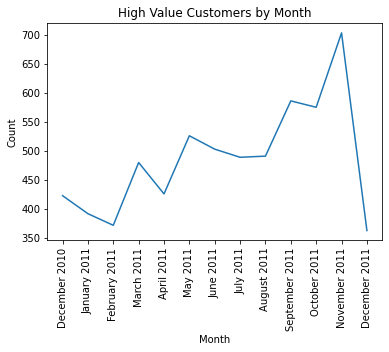

In [36]:
#Plotting high customer value per month
cvy_new.date = pd.to_datetime(cvy_new.date)
cvy_new.date = cvy_new.date.dt.strftime('%B %Y')
sns.lineplot(data = cvy_new, x= 'date', y = cvy_new[cvy_new.segments == 'High']['customer_id'])
plt.title('High Value Customers by Month')
plt.ylabel('Count')
plt.xlabel('Month')
plt.xticks(rotation = 90)

The number of high value customer is decreasing significantly at the end of the year